In [20]:
! pip install geopandas networkx libpysal

### import packages

In [21]:
import geopandas as gpd
import networkx as nx
import libpysal as lp
import matplotlib.pyplot as plt

In [22]:
# easiest way to make a good adjacency graph was by using libpysal to generate spatial weights
# srcs: https://stackoverflow.com/questions/64462857/python-3-geopandas-dataframe-with-crs-coordinates-into-graph-to-find-connected
#       https://pysal.org/libpysal/generated/libpysal.weights.Rook.html

gdf = gpd.read_file('../assets/tableau/taxi_zones/taxi_zones.shp')  # read shapefile
W = lp.weights.Queen.from_dataframe(gdf)  # generate spatial weights
G = W.to_networkx() # get networkx.Graph

/tmp/ipykernel_6727/1873910437.py:6: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = lp.weights.Queen.from_dataframe(gdf)  # generate spatial weights
/home/edr/mambaforge/envs/taxi-forecast/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 6 islands with ids: 0, 45, 102, 103, 104, 201.
  W.__init__(self, neighbors, ids=ids, **kw)


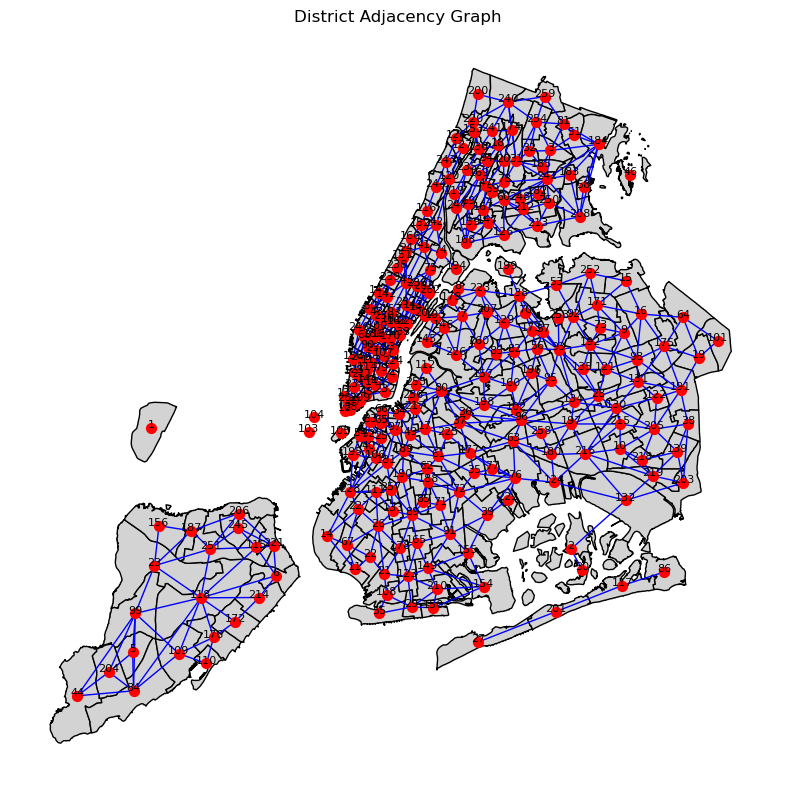

In [23]:
# plot the graph
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
for i, row in gdf.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['OBJECTID'], fontsize=8, ha='center')

pos = {i: (geom.centroid.x, geom.centroid.y) for i, geom in enumerate(gdf.geometry)}
nx.draw(G, pos, ax=ax, node_size=50, node_color='red', edge_color='blue')

plt.title('District Adjacency Graph')
plt.show()


### Thoughts:
For places large areas like Staten Island, Brooklyn, etc. We can probably just connect them by bridge. However, Newark airport is a bit ambiguous given that there are no direct connections. Finally, I'm thinking of removing Liberty Island, Ellis Island, and Governor Island altogether. 

Within the other areas, should check for bridges that connect places that are separated by water like Jamaica Islands towards the SE.

For now, let's just stick to Manhattan.

/tmp/ipykernel_6727/132580181.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = lp.weights.Queen.from_dataframe(gdf)  # generate spatial weights
/home/edr/mambaforge/envs/taxi-forecast/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 5 islands with ids: 18, 19, 20, 38, 48.
  W.__init__(self, neighbors, ids=ids, **kw)


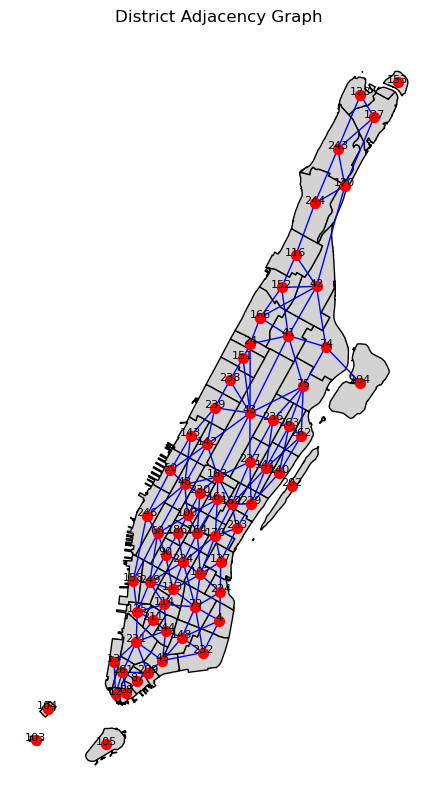

In [24]:
gdf = gdf[gdf['borough'] == 'Manhattan']  # filter to only Manhattan
W = lp.weights.Queen.from_dataframe(gdf)  # generate spatial weights
G = W.to_networkx() # get networkx.Graph

# plot the graph
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
for i, row in gdf.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['OBJECTID'], fontsize=8, ha='center')

pos = {i: (geom.centroid.x, geom.centroid.y) for i, geom in enumerate(gdf.geometry)}
nx.draw(G, pos, ax=ax, node_size=50, node_color='red', edge_color='blue')

plt.title('District Adjacency Graph')
plt.show()